[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iustina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iustina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


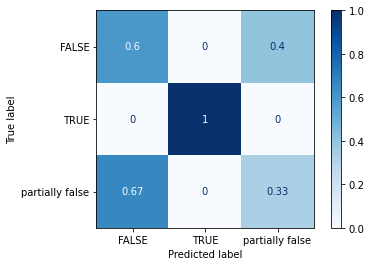

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction import FeatureHasher

dataset = pd.read_csv('CLEF.csv', delimiter = '\t')


X=dataset.drop(columns=['our rating'])
y=dataset['our rating']

X['total'] = X['title'] + ' ' + X['text']


words = X.copy()


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
corpus = []
corpus_test = []

for i in range(len(words)):
    review = re.sub('[^a-zA-Z]', ' ', words['total'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
    
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_vec.fit_transform(corpus).toarray()


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)



model=DecisionTreeClassifier()

model.fit(X_train,y_train)

predictions=model.predict(X_test)



from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [6]:
score=accuracy_score(y_test, predictions)
score

0.6

In [ ]:
score1=f1_score(y_test,predictions, average=None)
score1

In [ ]:

score2=recall_score(y_test, predictions, average=None)
score2